# Scientific Programming

In [1]:
## Notebook settings 

# multiple lines of output per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

>### Today
>
> - Scientific programming
>    - [NumPy](#NumPy)
>    - [Matplotlib](#Matplotlib)
> 
>
> - Regular expressions (another notebook)

## A Sample of Python Libraries for Scientific Programming

In addition to the Standard Library, `python.org` offers an ever-growing collection of freely available components that are constantly upgraded, tested and updated. There are many modules, packages and programs available from [PyPI](https://pypi.python.org/pypi) - the Python Package Index. 

These libraries are developed either to extend the functionalities of Python, or as more specialized/efficient version of existing modules (or both). In the remaining of this tutorial we will briefly introduce two fundamental packages for scientific computing with Python: **NumPy** and **matplotlib**.

## NumPy

The **Num**eric(al) **Py**thon package is the core library for scientific computing in Python. It enriches Python with high performance data structures, as well as with function to manipulate such data structures and for a whole range of numerical routines. 

**SciPy**, another core scientific package provides a wide inventory on functions that, by operating on NumPy arrays, can be used for a range of scientific applications.

In [2]:
# when imported, numpy is usually renamed as "np". 
import numpy as np

#### Arrays

**ndarrays** (i.e. *N*-dimensional arrays) are the main data structure on which NumPy is based. 

ndarrays are **multidimensional** **homogeneous** arrays composed by a **predetermined number** of items:


- the dimensionality of an ndarray is defined by its **shape** (i.e., a tuple of integers specifying the size of each dimension, a.k.a. *axes*). The number of axes of an array is called its **rank**. 


- Sometimes "dimension" is used interchangeably for the shape and the rank of an array.


- Ndarrays are composed by items of the same type. In NumPy arrays, types are defined by the object **dtype** (data-type), and each array is associated to one and only one dtype.


- When a ndarray is created, its size is defined and cannot be changed.

NumPy arrays can be created in many different ways, among which by passing a regular Python list or tuple to the `array()` function:

In [3]:
# let's create a rank-1 array (i.e. a vector)
a = np.array([1, 2, 3, 4, 5, 6])
print(a)

[1 2 3 4 5 6]


In [4]:
# let's verify that this is a numpy array
type(a)

numpy.ndarray

In [5]:
# this is a rank-1 array
a.ndim

1

In [6]:
# its only axis has shape [6]
a.shape

(6,)

In [7]:
# if not explicitly specified, array() automatically infers the dtype on the basis of the type of the 
# elements in the list
a.dtype

dtype('int64')

In [8]:
# indexing can be used to access values...
print(a[0], a[2], a[5])

1 3 6


In [9]:
# ... or to change them
a[1] = 9
a

array([1, 9, 3, 4, 5, 6])

In [10]:
# the rank of an array can be changed, e.g. into  2-rank array with 3 rows and 2 columns
# NB: row*col must be equal to no. of elements (6 here)
a.reshape(3, 2)

array([[1, 9],
       [3, 4],
       [5, 6]])

In [11]:
# the same syntax can be used to create rank 2 arrays
b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(b)
print(b.ndim)
print(b.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
2
(3, 3)


In [12]:
# but indexing is a bit more articulated
print(b[0, 0])
print(b[2, 1])

1
8


The `dtype` option can be used to specify to the `array()` function which type of elements are in the array (see the [NumPy documentation](https://docs.scipy.org/doc/numpy-1.10.1/user/basics.types.html) for the full list of supported data-types):

In [13]:
c = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype = "float32")
print(c)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


Arrays with some initial content can be created by using different functions, depending on the **initial value**...

In [14]:
# 2-rank array of zeros
a = np.zeros((3, 4))
print (a)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [15]:
# 2-rank array of ones
b = np.ones((3, 4))
print (b)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [16]:
# 2-rank array with an user-selected initial value
c = np.full((3, 4), 14.05)
print(c)

[[14.05 14.05 14.05 14.05]
 [14.05 14.05 14.05 14.05]
 [14.05 14.05 14.05 14.05]]


... or on the **function** used to generate the initial values:

In [17]:
# 3-rank array with random values
d = np.random.random((2, 3, 4))
print(d)

[[[0.0904358  0.77470158 0.3177095  0.21967632]
  [0.22035245 0.03111779 0.26451328 0.33709163]
  [0.16473415 0.70002986 0.7641751  0.24900002]]

 [[0.59536238 0.93562077 0.37195672 0.9190486 ]
  [0.33572707 0.80136177 0.2747715  0.23903339]
  [0.67345318 0.22368555 0.49437416 0.9984387 ]]]


NumPy display arrays according to the following rules:

- the last axis is printed left to right

- the second-to-last is printed top to bottom

- the rest are printed top to bottom as well, but the slices are separated by empty lines

#### Array Indexing

1-rank array indexing, slicing and iteration works much as for the normal Python lists:

In [18]:
a = np.array([1, 2, 3, 4, 5, 6])
print(a[2])
print(a[2:5])
for v in a: print(v)

3
[3 4 5]
1
2
3
4
5
6


When dealing with multidimensional arrays (i.e. rank > 1), it is necessary to specify an index or a slice **for each dimension**:

In [19]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(a.shape)

print(a), print("--------")

print(a[1, 1]), print("--------")

print(a[0:2]), print("--------")

print(a[:, 1:3]), print("--------")

print(a[0:2, 1:3])

(3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
--------


(None, None)

5
--------


(None, None)

[[1 2 3]
 [4 5 6]]
--------


(None, None)

[[2 3]
 [5 6]
 [8 9]]
--------


(None, None)

[[2 3]
 [5 6]]


In [20]:
# unspecified indices works the same as with normal lists
print(a[:2, :3])

[[1 2 3]
 [4 5 6]]


In [21]:
# missing indices are considered complete slices
print(a[1])

[4 5 6]


In [22]:
# negative indices can be used as well
print (a[-1])

[7 8 9]


The iteration over multidimensional arrays starts always with respect to the first axis:

In [23]:
for v in a: print(v)

[1 2 3]
[4 5 6]
[7 8 9]


**boolean indexing** allows you to pick out all the array elements that satisfy a given condition

In [24]:
# let's create a boolean array of the same shape as "a", where each slot tells us if 
# that element of "a" is an even number
even_idx = ( a % 2 == 0 )
print(even_idx)

[[False  True False]
 [ True False  True]
 [False  True False]]


In [25]:
# let's extract the even numbers in our array
print(a[even_idx])

[2 4 6 8]


#### Basic Math 

Basic mathematical functions apply element-wise:

In [26]:
# e.g. for the sum
print(b + c)

[[15.05 15.05 15.05 15.05]
 [15.05 15.05 15.05 15.05]
 [15.05 15.05 15.05 15.05]]


In [27]:
# element-wise multiplication
print(b * c)

[[14.05 14.05 14.05 14.05]
 [14.05 14.05 14.05 14.05]
 [14.05 14.05 14.05 14.05]]


The function `dot()` can be used to calculate the inner product:

In [28]:
# inner product of rank 1 matrices, or vectors (returns a number, i.e. a scalar)
print(np.dot(np.array([9, 10]), np.array([11, 12])))

219


In [29]:
# matrix-vector multiplication
print(np.dot(np.array([[1, -1, 2],[0, -3, 1]]), np.array([2, 1, 0])))

[ 1 -3]


In [30]:
# matrix-matrix multiplication
print(np.dot(np.array([[0, 4, -2], [-4, -3, 0]]), np.array([[0, 1], [1, -1], [2, 3]])))

[[  0 -10]
 [ -3  -1]]


Finally, Numpy functions allow to perform computation on arrays or to transform them

In [31]:
# compute the sum of all the elements along an axis
print(b)
print("--------")
print(np.sum(b)) # sum all element
print("--------")
print(np.sum(b, axis=0)) # think: sum over and "collapse" axis 0 (= columns)
print("--------")
print(np.sum(b, axis=1)) # think: sum over and "collapse" axis 1 (= rows)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
--------
12.0
--------
[3. 3. 3. 3.]
--------
[4. 4. 4.]


In [32]:
# transpose of a matrix
f = np.arange(6).reshape(2,3)
print(f.shape)
print(f)
print("--------")
f_transp = f.T
print(f_transp.shape)
print(f_transp)

(2, 3)
[[0 1 2]
 [3 4 5]]
--------
(3, 2)
[[0 3]
 [1 4]
 [2 5]]


In [33]:
# 3 different types of vectors
a_1 = np.arange(5)
print(">> 'regular' (rank 1) vector <<")
print("rank: " + str(a_1.ndim))
print("shape: " + str(a_1.shape))
print(a_1), print("--------")

a_2 = a_1.reshape(5,1)
print(">> column vector <<")
print("rank: " + str(a_2.ndim))
print("shape: " + str(a_2.shape))

print(a_2), print("--------")

a_3 = a_2.reshape(1,5)
print(">> row vector <<")
print("rank: " + str(a_3.ndim))
print("shape: " + str(a_3.shape))
print(a_3)

>> 'regular' (rank 1) vector <<
rank: 1
shape: (5,)
[0 1 2 3 4]
--------


(None, None)

>> column vector <<
rank: 2
shape: (5, 1)
[[0]
 [1]
 [2]
 [3]
 [4]]
--------


(None, None)

>> row vector <<
rank: 2
shape: (1, 5)
[[0 1 2 3 4]]


`np.linalg` provides access to linear algebra functions, e.g., solvers, eigenvalues/vectors, norms and decompositions.

In [34]:
# inverse of a matrix
a = np.array([[1., 2.], [3., 4.]])
print(a)
print(np.linalg.inv(a))
print(np.allclose(np.dot(a,np.linalg.inv(a)),np.eye(2)))
print("--------")
print(np.linalg.det(a))

[[1. 2.]
 [3. 4.]]
[[-2.   1. ]
 [ 1.5 -0.5]]
True
--------
-2.0000000000000004


---

## Matplotlib

matlotlib is a 2D **plotting library**. 
 
You can have an idea of the possibilities offered by this package by exploring the [examples](http://matplotlib.org/examples/index.html) section of the documentation

The easiest way to drop plots with matplotlib it is by relying on the MATLAB-like interface provided by the `pyplot` module.

In [35]:
import matplotlib.pyplot as plt

# to make plots in IPython using Matplotlib, you must first enable IPython's matplotlib mode
# we may want to use the backend inline, that will embed plots inside the Notebook
%matplotlib inline  

##### Line plots

Line plots represents the relationship between *x*-values and *y*-values by means of a line. 

Graphs of this sort can be drawn by using the [`.plot()` function](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot), with its default settings 

In [36]:
# make an array for the x-values and one array for the y-values
x = np.arange(1, 150)
y = np.log(x)

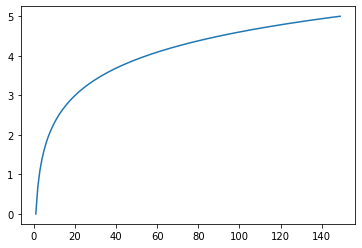

In [37]:
# let's create the plot
plt.plot(x, y)

In [38]:
# export the plot in a .pdf file
plt.savefig("data/exemplar-lineplot.pdf")

<Figure size 432x288 with 0 Axes>

In [39]:
# export the plot in a .png file
plt.savefig("data/exemplar-lineplot.png")

<Figure size 432x288 with 0 Axes>

Multiple calls of the `.plot()` function draw **multiple line plots** in the same figure 

(note that matplotlib will try to automatically manage many graphical parameters among which the axis size and the line colors)

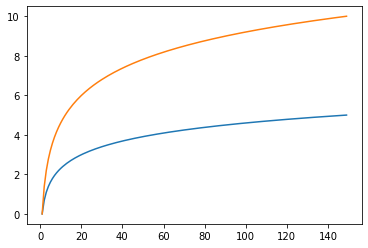

In [40]:
plt.plot(x, y) # think of (x, y) as an array (of rank 2) being plotted
plt.plot(x, y * 2)

##### Scatterplots

A scatterplot represents one or more groups of observations as points in a cartesian space. 

The [`scatter()` function](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) implements a method to draw this kind of plots.

In [41]:
n = 100
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)

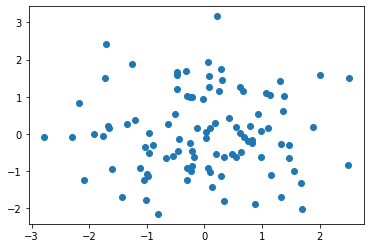

In [42]:
plt.scatter(x, y)

We can use different marker settings for `plot()` (marker type, size)

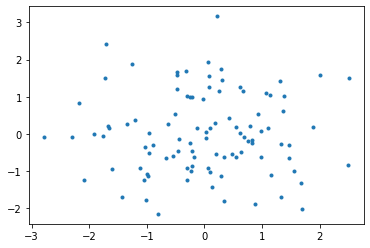

In [43]:
plt.plot(x, y, ".")

Color-coding (the default behavior of both `scatter()` and `plot()` allows you to plot different groups of data points:

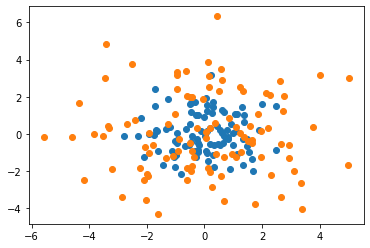

In [44]:
plt.scatter(x, y)
plt.scatter(x * 2 , y * 2) # what's happening here? (hint: array-like input to scatter...)

##### Manipulating the appearance of a plot

Matplotlib allows you to manipulate almost every property of a plot: figure size and resolution, line appearance, axis and grid properties, textual elements ...

In [45]:
x = np.arange(1, 150)
y = np.log(x)

You to change the appearance of the **line**

(NOTE: See the [matplotlib documentation](https://matplotlib.org/users/colors.html) for a quick introduction on how a color can be specified by the user)

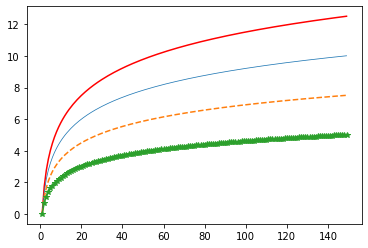

In [46]:
plt.plot(x, y * 2.5, color = "r")  # you can change the line color 
plt.plot(x, y * 2, linewidth = 0.75)  # you can change the line width
plt.plot(x, y * 1.5, linestyle = '--')  # you can change the line style
plt.plot(x, y, marker = '*')  # you can change the marker style

You can manually choose the **axis limits**, the **axis titles**, the **axis ticks** and **their text** (and plot a grid, if you like):

(0.0, 7.0)

(-5.0, 155.0)

Text(0, 0.5, 'log (x)')

([<matplotlib.axis.XTick at 0x11cbda520>,
 [Text(0, 0, 'zero'),
  Text(50, 0, 'fifty'),
  Text(100, 0, 'one hundred'),
  Text(150, 0, 'one hundred and fifty')])

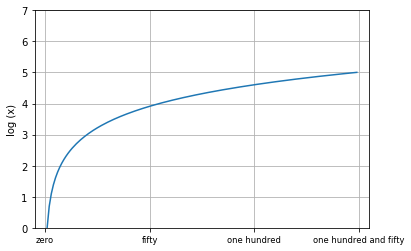

In [47]:
plt.plot(x, y)

# set the axis limits
plt.ylim(0, 7)  
plt.xlim(-5, 155)  # set the x-axes limits

# let's set the y-axis text
plt.ylabel("log (x)")

# let's set the x-axis ticks and their text (in an awful way...)
plt.xticks(range(0, 151, 50), ["zero", "fifty", "one hundred", "one hundred and fifty"], size='small')

# fancy a grid?
plt.grid(True)

You can give the plot a **main title** and add a **legend**

Text(0.5, 1.0, 'Logarithms Comparison')

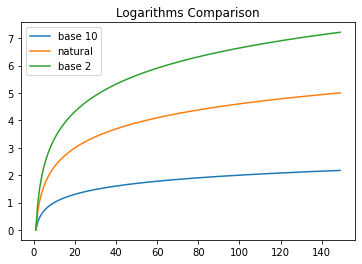

In [48]:
plt.plot(x, np.log10(x))
plt.plot(x, np.log(x))
plt.plot(x, np.log2(x))

# create the main title
plt.title('Logarithms Comparison')

# add a legend
plt.legend(['base 10', 'natural', 'base 2'])

You can also **annotate** some points that may be of any interest (see [this tutorial](https://matplotlib.org/users/annotations_intro.html))

Text(35, 2, "that's log(20) !")

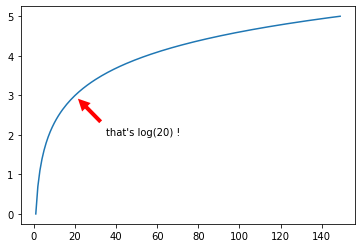

In [49]:
plt.plot(x, y)
plt.annotate("that's log(20) !", xy = (20, np.log(20)), xytext = (35, 2), 
             arrowprops=dict(facecolor='r', edgecolor='None', shrink=0.1))

##### Bar plots

Unfortunately, humans are quite bad at comparing angles, so a better way to compare the frequencies of categorical data is to use bar plots. In these graphs:

- every bar is associated with a given value


- the height of each bar is proportional to the frequency of a given value


- all the bars have the same width

These plots can be drawn by using the [`bar()`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) or the [`barh()](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh) functions

In [50]:
import string

n = 12
x = np.arange(n)
y = np.random.uniform(0.5, 1.0, n)

<BarContainer object of 12 artists>

([<matplotlib.axis.XTick at 0x11cf91340>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H'),
  Text(8, 0, 'I'),
  Text(9, 0, 'J'),
  Text(10, 0, 'K'),
  Text(11, 0, 'L')])

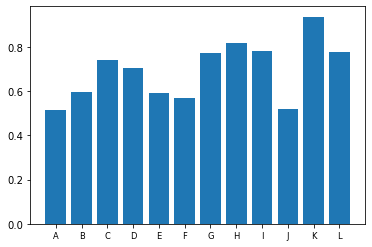

In [51]:
# vertical barplot
plt.bar(x, y)
plt.xticks(x, list(string.ascii_uppercase[:12]), size='small') # let's use some random letters for each value of a variable

<BarContainer object of 12 artists>

([<matplotlib.axis.YTick at 0x11d21f8e0>,
 [Text(0, 0, 'A'),
  Text(0, 1, 'B'),
  Text(0, 2, 'C'),
  Text(0, 3, 'D'),
  Text(0, 4, 'E'),
  Text(0, 5, 'F'),
  Text(0, 6, 'G'),
  Text(0, 7, 'H'),
  Text(0, 8, 'I'),
  Text(0, 9, 'J'),
  Text(0, 10, 'K'),
  Text(0, 11, 'L')])

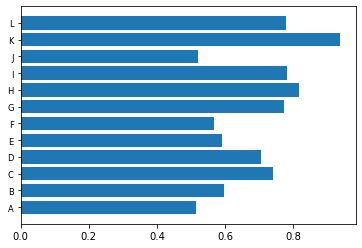

In [52]:
# horizontal barplot
plt.barh(x, y)
plt.yticks(x, list(string.ascii_uppercase[:12]), size='small')

##### Histograms

Roughly speaking, histogram are for continuous (a.k.a. numerical) variables what barplots are for categorical variables. Also in this kind of plot, indeed, values are represented by means of bars. However:


- each bar is associated with a bin (i.e. an interval of values)


- the area inside the bars (rather than their height) is proportional to the frequency of a value or of a set of values


- the width of each bar is proportional to the bin size.



The [`hist()`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) function implements most of the functionalities you'll need to plot histograms.

In [53]:
data = np.random.normal(-1, 1, 10000)

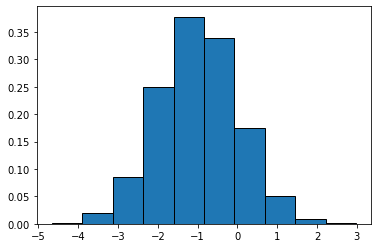

In [54]:
a = plt.hist(data, density = True, edgecolor='black')

the `bins` argument allows us to specify in how many bins we want to organize our values:

(array([0.00130731, 0.00065365, 0.00130731, 0.00261461, 0.00326826,
        0.00457557, 0.01176575, 0.01960959, 0.02287785, 0.03987283,
        0.03856552, 0.06797991, 0.08497489, 0.09935525, 0.13138425,
        0.17844726, 0.20459338, 0.23270045, 0.29675845, 0.33859223,
        0.35362625, 0.37062123, 0.37127488, 0.3850016 , 0.4072258 ,
        0.37062123, 0.39676735, 0.33728493, 0.32028995, 0.27257329,
        0.23727603, 0.21897374, 0.1764863 , 0.14315   , 0.1000089 ,
        0.0888968 , 0.06471164, 0.03660457, 0.03464361, 0.02483881,
        0.0111121 , 0.01307306, 0.00653653, 0.00588288, 0.00261461,
        0.00326826, 0.        , 0.        , 0.00065365, 0.00130731]),
 array([-4.66458162, -4.51159524, -4.35860887, -4.20562249, -4.05263611,
        -3.89964973, -3.74666335, -3.59367697, -3.44069059, -3.28770421,
        -3.13471783, -2.98173145, -2.82874507, -2.6757587 , -2.52277232,
        -2.36978594, -2.21679956, -2.06381318, -1.9108268 , -1.75784042,
        -1.60485404, -1.45

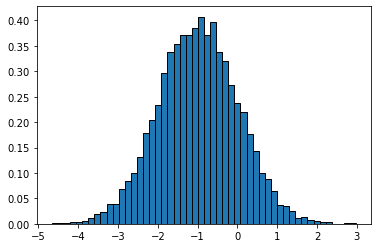

In [55]:
plt.hist(data, bins = 50, density = True, edgecolor='black')

(array([0.00196096, 0.        , 0.00196096, 0.        , 0.        ,
        0.00196096, 0.00196096, 0.00196096, 0.        , 0.        ,
        0.00588288, 0.00196096, 0.00196096, 0.00392192, 0.00392192,
        0.00784384, 0.        , 0.00588288, 0.01764863, 0.00980479,
        0.00784384, 0.01176575, 0.01372671, 0.0333363 , 0.02157055,
        0.02353151, 0.02353151, 0.03725822, 0.04118014, 0.04118014,
        0.03529726, 0.03529726, 0.04510205, 0.0666726 , 0.07255548,
        0.06471164, 0.07255548, 0.09020411, 0.09216507, 0.1098137 ,
        0.08628219, 0.10196986, 0.11765753, 0.12942329, 0.14707192,
        0.16079863, 0.18040822, 0.19413493, 0.21374452, 0.20590068,
        0.19413493, 0.23531507, 0.23139315, 0.23139315, 0.3098315 ,
        0.2863    , 0.29414383, 0.33140205, 0.32944109, 0.35493356,
        0.33532397, 0.3961137 , 0.32944109, 0.3961137 , 0.34512876,
        0.37062123, 0.3961137 , 0.35885548, 0.35885548, 0.37258219,
        0.40395753, 0.37846507, 0.43729383, 0.40

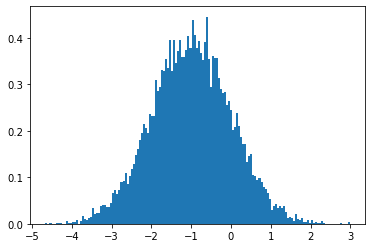

In [56]:
# we won't draw the edge of each bar
plt.hist(data, bins = 150, density = True)

We set `density = True` in order to plot the **frequency density** of a bin (i.e. the relative frequency of a bin divided by its width), rather than its relative (or absolute) frequency (as it is in the graph bar). 

When the bins are equally spaced, the relative (or absolute) frequency and the frequency density are proportional. However, this proportionality is lost when the histograms plots the density of **unequally spaced** bins (i.e. when the value of the argument `bins` is a sequence).

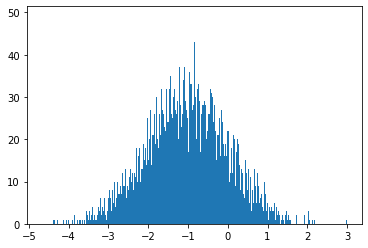

In [57]:
n, bins, patches = plt.hist(data, bins = 999, density = False)

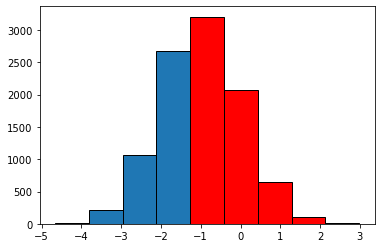

In [58]:
# equal bins ('density' doesn't matter for overall 'shape')
n, bins, patches = plt.hist(data, bins = 9, density = False,  edgecolor='black')
patches[4].set_fc("r")
patches[5].set_fc("r")
patches[6].set_fc("r")
patches[7].set_fc("r")
patches[8].set_fc("r")

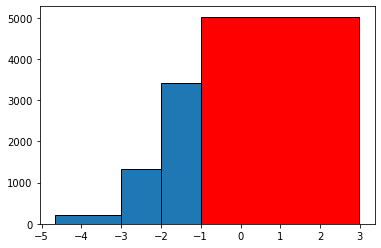

In [59]:
# unequal bins. density = False (relative frequency)
n, bins, patches = plt.hist(data, bins = np.array([min(data), -3, -2, -1, max(data)]), density = False,  edgecolor='black')
patches[3].set_fc("r")

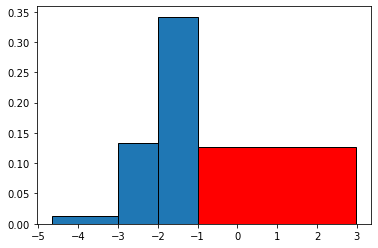

In [60]:
# unequal bins. density = True (frequency density)
n, bins, patches = plt.hist(data, bins = np.array([min(data), -3, -2, -1, max(data)]), density = True, edgecolor='black')
patches[3].set_fc("r")

##### Drawing several plots per canvas

Multiple plots per canvas can be drawn by using the function `subplot()` to setup a grid and activate one plot per time

In [61]:
%matplotlib auto

x = np.arange(1, 150)
y_base10_log = np.log10(x)
y_natural_log = np.log(x)
y_base2_log = np.log2(x)

Using matplotlib backend: MacOSX


In [62]:
# Set up a 2 x 2 grid, set the first plot as active and draw the first curve
plt.subplot(2, 2, 1)
plt.plot(x, y_base10_log)
plt.title('Base 10 Log')

# uncomment to compare subplots with the same y-axis limits
# plt.ylim(0,8) 

<AxesSubplot:>

Text(0.5, 1.0, 'Base 10 Log')

In [63]:
# activate the second subplot and draw the second curve
plt.subplot(2, 2, 2)
plt.plot(x, y_natural_log)
plt.title('Natural Log')

# uncomment to compare subplots with the same y-axis limits
# plt.ylim(0,8) 

<AxesSubplot:>

Text(0.5, 1.0, 'Natural Log')

In [64]:
# activate the third subplot and draw the third curve
plt.subplot(2, 2, 3)
plt.plot(x, y_base2_log)
plt.title('Base 2 Log')

# uncomment to compare subplots with the same y-axis limits
# plt.ylim(0,8) 

<AxesSubplot:>

Text(0.5, 1.0, 'Base 2 Log')

In [65]:
plt.tight_layout()  # adjust spacing between subplots to minimize the overlaps.
plt.show()

> **Further Reading:**
>
> Tutorial introductions to the Python scientific computing libraries (including other libraries that we'll briefly use in this class, such as "SciPy", "Pandas" and "scikit-learn") can be found in:
>
> - the [SciPy Lecture Notes](http://www.scipy-lectures.org/) ( the [pdf version](http://www.scipy-lectures.org/_downloads/ScipyLectures-simple.pdf)).
>
>
> - The `python-course.eu` section dedicated to [Numerical Python](https://www.python-course.eu/numerical_programming.php).
>
>
> - For a gentle introduction to the main matplotlib modules, have a look at the [beginner's guide](https://matplotlib.org/users/beginner.html) available on `matplotlib.org`.
>
>
> - An excellent plotting package built on top of matplotlib is called [`Seaborn`](https://seaborn.pydata.org).

### Exercise 1.

Plot the sine and the cosine waves in the same graph

In [66]:
# your code here

### Exercise 2.

Read the file data/adams-hhgttg.txt and:


- count the occurrences of each word.


- Create a graph plotting word frequencies (on the **y-axis**) by words sorted by frequency (that is, you list the corpus words from the most frequency to the least frequent words **x-axis**). For clarity, please do not report the words in the x-axis label.


- In a similar graph, plot the frequencies of the top-frequent 25 words.

In [67]:
# your code here

---